In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [228]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Cleaning

In [230]:
# we need to change column names and drop Unnamed: 2',Unnamed: 3 and Unnamed: 4 these columns

df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [231]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
df.duplicated().sum()

403

In [233]:
df.drop_duplicates(keep='first', inplace=True)

In [234]:
df.shape

(5169, 2)

In [235]:
df.isna().sum()


target    0
sms       0
dtype: int64

In [236]:
df.loc[df.target=='ham', 'target'] = 0
df.loc[df.target=='spam', 'target'] = 1

In [237]:
df['sms'][399]

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

## Data Visulization

<Axes: xlabel='target', ylabel='count'>

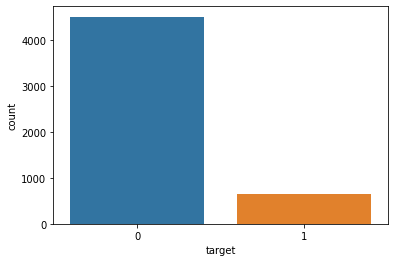

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="target")

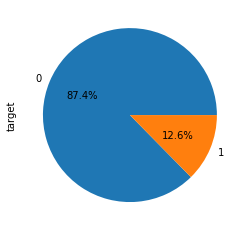

In [239]:
df.target.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

**Since the data is imbalanced we need to take that into consideration while splitting the training and testing set**

### Data Preprocessing


In [240]:
## Diving dataset target and indpendent features

X = df['sms']

In [241]:
y=df['target']

In [242]:
X.shape,y.shape

((5169,), (5169,))

In [243]:
X.reset_index()
X.index = range(len(X))
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165                Will Ì_ b going to esplanade fr home?
5166    Pity, * was in mood for that. So...any other s...
5167    The guy did some bitching but I acted like i'd...
5168                           Rofl. Its true to its name
Name: sms, Length: 5169, dtype: object

In [244]:
y.reset_index()
y.index = range(len(y))
y

0       0
1       0
2       1
3       0
4       0
       ..
5164    1
5165    0
5166    0
5167    0
5168    0
Name: target, Length: 5169, dtype: object

In [245]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense , LSTM ,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import EarlyStopping

In [246]:
stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=False)


In [247]:
import nltk 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [248]:
ps = PorterStemmer()

In [249]:
corpus =[]

for i in range(len(X)):
    text = re.sub('[^A-Za-z]',' ',X[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word)for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)


In [250]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [251]:
## One hot Representation 

voc_size = 5000

one_hot_rep = [one_hot(words,voc_size)for words in corpus]

In [252]:
corpus[1],one_hot_rep[1]

('ok lar joke wif u oni', [24, 4057, 3251, 2460, 494, 3690])

In [253]:
## Embedding representation
sent_length = 30

embedding_doc = pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)

In [254]:
embedding_doc

array([[1614, 4950, 4316, ...,    0,    0,    0],
       [  24, 4057, 3251, ...,    0,    0,    0],
       [1193, 1774, 2728, ...,    0,    0,    0],
       ...,
       [3234, 4752,  155, ...,    0,    0,    0],
       [3599, 4871, 4026, ...,    0,    0,    0],
       [2308, 2392, 1174, ...,    0,    0,    0]], dtype=int32)

In [255]:
corpus[1],one_hot_rep[1],embedding_doc[1]

('ok lar joke wif u oni',
 [24, 4057, 3251, 2460, 494, 3690],
 array([  24, 4057, 3251, 2460,  494, 3690,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

In [256]:
model =Sequential()
model.add(Embedding(voc_size,40,input_length = sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [257]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 40)            200000    
                                                                 
 lstm_5 (LSTM)               (None, 100)               56400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [258]:
X_final = np.array(embedding_doc)
y_final = np.array(y)

In [259]:
X_final.shape,y_final.shape

((5169, 30), (5169,))

In [260]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [261]:
X_train.shape,X_test.shape

((4135, 30), (1034, 30))

In [262]:
y_train.shape,y_test.shape

((4135,), (1034,))

In [263]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [265]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [266]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=10,batch_size=40)

Epoch 1/10
104/104 [==============================] - 10s 52ms/step - loss: 0.4070 - accuracy: 0.8771 - val_loss: 0.4057 - val_accuracy: 0.8598
Epoch 2/10
104/104 [==============================] - 6s 60ms/step - loss: 0.3769 - accuracy: 0.8771 - val_loss: 0.4060 - val_accuracy: 0.8598
Epoch 3/10
104/104 [==============================] - 6s 59ms/step - loss: 0.3743 - accuracy: 0.8771 - val_loss: 0.4104 - val_accuracy: 0.8598
Epoch 4/10
104/104 [==============================] - 7s 63ms/step - loss: 0.3734 - accuracy: 0.8771 - val_loss: 0.4096 - val_accuracy: 0.8598
Epoch 5/10
104/104 [==============================] - 6s 54ms/step - loss: 0.3736 - accuracy: 0.8771 - val_loss: 0.4056 - val_accuracy: 0.8598
Epoch 6/10
104/104 [==============================] - 5s 53ms/step - loss: 0.3732 - accuracy: 0.8771 - val_loss: 0.4054 - val_accuracy: 0.8598
Epoch 7/10
104/104 [==============================] - 8s 74ms/step - loss: 0.3731 - accuracy: 0.8771 - val_loss: 0.4115 - val_accuracy: 0.859

In [267]:
y_pred = model.predict(X_test_scaled)

33/33 [==============================] - 3s 15ms/step


In [268]:
y_pred = np.where(y_pred > 0.5, 1, 0).astype(int)

In [269]:
y_test = y_test.astype(int)


In [270]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8597678916827853


## Model training  (Ml Models)

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,f1_score

In [272]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1), 
    "Ada Boost": AdaBoostClassifier(n_estimators=60),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=60),
    "XGB": XGBClassifier(n_estimators=60),
}

In [273]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score = f1_score(y_test,y_pred)
    return accuracy, precision, recall, F1_score

In [274]:
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

for key, model_n in models.items():
    accuracy, precision ,recall,F1_score= train_clf(model_n, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    F1_scores.append(F1_score)

    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, '  + 
         f'recall: {np.round(recall, 2)}, '   +
         f'F1_score: {np.round(F1_score, 2)}, ' 
         )


/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression, accuracy: 0.86, precision: 0.49, recall: 0.3, F1_score: 0.37, 
Model: SCV, accuracy: 0.87, precision: 0.54, recall: 0.27, F1_score: 0.36, 
Model: KNN, accuracy: 0.87, precision: 0.55, recall: 0.43, F1_score: 0.48, 
Model: MNB, accuracy: 0.83, precision: 0.44, recall: 0.75, F1_score: 0.55, 
Model: Decision Tree, accuracy: 0.85, precision: 0.47, recall: 0.32, F1_score: 0.38, 
Model: Random Forest, accuracy: 0.9, precision: 0.73, recall: 0.45, F1_score: 0.56, 
Model: Ada Boost, accuracy: 0.89, precision: 0.66, recall: 0.48, F1_score: 0.55, 
Model: Gradient Boosting, accuracy: 0.89, precision: 0.74, recall: 0.35, F1_score: 0.48, 
Model: XGB, accuracy: 0.92, precision: 0.79, recall: 0.61, F1_score: 0.68, 


In [275]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1_score':F1_scores})

In [276]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1_score
8,XGB,0.921663,0.785714,0.606897,0.684825
7,Gradient Boosting,0.891683,0.739130,0.351724,0.476636
5,Random Forest,0.899420,0.730337,0.448276,0.555556
6,Ada Boost,0.891683,0.657143,0.475862,0.552000
2,KNN,0.871373,0.553571,0.427586,0.482490
1,SCV,0.865571,0.541667,0.268966,0.359447
0,Logistic Regression,0.858801,0.494253,0.296552,0.370690
4,Decision Tree,0.853965,0.470000,0.324138,0.383673
3,MNB,0.830754,0.439516,0.751724,0.554707


In [277]:
y_pred=model.predict(X_test_scaled)

33/33 [==============================] - 1s 19ms/step


In [278]:
y_pred = np.where(y_pred>0.5,1,0)

In [279]:
accuracy_score(y_test,y_pred)

0.8597678916827853